In [2]:
from pydriller import Repository
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [14]:
df_pr = pd.read_csv("pr_reviews_dask.csv", delimiter=',')
df_pr.columns = [
  "author_login",
  "author_association",
  "body",
  "submitted_at",
  "includes_created_edit",
  "state"
]
df_pr

,author_login,author_association,body,submitted_at,includes_created_edit,state
0,rjzamora,MEMBER,Thanks @charlesbluca !,2024-08-23T20:42:06Z,False,APPROVED
1,phofl,COLLABORATOR,NaN,2024-08-21T13:22:08Z,False,APPROVED
2,jrbourbeau,MEMBER,Thanks @phofl,2024-08-21T13:16:55Z,False,COMMENTED
3,hendrikmakait,MEMBER,NaN,2024-08-26T14:42:21Z,False,COMMENTED
4,phofl,COLLABORATOR,NaN,2024-08-26T18:44:07Z,False,COMMENTED
...,...,...,...,...,...,...
14553,jcrist,MEMBER,NaN,2016-09-27T16:46:37Z,False,COMMENTED
14554,TomAugspurger,MEMBER,NaN,2016-09-23T15:16:18Z,False,COMMENTED
14555,mrocklin,MEMBER,NaN,2016-09-23T16:19:58Z,False,COMMENTED
14556,jcrist,MEMBER,NaN,2016-09-19T18:21:01Z,False,COMMENTED


In [15]:
repositorio = 'https://github.com/dask/dask.git'
df_commits = pd.read_csv("DF Commits Dask.csv")
df_commits

,hash,message,author_name,author_email,author_date,committer_name,committer_email,committer_date
0,05488db498c1561d266c7b676b8a89021c03a9e7,first commit -a,Matthew Rocklin,mrocklin@gmail.com,2014-12-21 13:26:20-08:00,Matthew Rocklin,mrocklin@gmail.com,2014-12-21 13:26:20-08:00
1,3a2401080c77535ae8e997c775f957af877a846a,accept args not in dict,Matthew Rocklin,mrocklin@gmail.com,2014-12-21 13:43:44-08:00,Matthew Rocklin,mrocklin@gmail.com,2014-12-21 13:43:44-08:00
2,379f9c354d0c31175e3593dd56fb32a34c41d1a9,draft of array functions,Matthew Rocklin,mrocklin@gmail.com,2014-12-23 11:00:24-08:00,Matthew Rocklin,mrocklin@gmail.com,2014-12-23 11:00:24-08:00
3,0fdd20304627607e53c561a7c34d205defa1c413,chunked transpose + 1 test,Matthew Rocklin,mrocklin@gmail.com,2014-12-23 11:11:45-08:00,Matthew Rocklin,mrocklin@gmail.com,2014-12-23 11:11:45-08:00
4,18463b0c7277240765d05ada1b9fb69364b1e128,clean up top docstring,Matthew Rocklin,mrocklin@gmail.com,2014-12-23 11:16:44-08:00,Matthew Rocklin,mrocklin@gmail.com,2014-12-23 11:16:44-08:00
...,...,...,...,...,...,...,...,...
8291,984f24abdea8fdb1a6644270baa9df0d75dc3f1f,Update ``numpy`` and ``pyarrow`` versions in i...,James Bourbeau,jrbourbeau@users.noreply.github.com,2024-08-21 08:36:53-05:00,GitHub,noreply@github.com,2024-08-21 08:36:53-05:00
8292,2fbe18b29378f281f87341253c743f98f8e9ac72,Increase visibility of GPU CI updates (#11345),Charles Blackmon-Luca,20627856+charlesbluca@users.noreply.github.com,2024-08-23 16:42:15-04:00,GitHub,noreply@github.com,2024-08-23 15:42:15-05:00
8293,f8171f12f93b4bb47ef04945e20a6d6903e3b664,Make rechunking in shuffle more intelligent to...,Patrick Hoefler,61934744+phofl@users.noreply.github.com,2024-08-27 13:22:03+02:00,GitHub,noreply@github.com,2024-08-27 13:22:03+02:00
8294,72a14822139eedd140d928aa3b465706a04403f1,Implement blockwise reshaping API for arrays (...,Patrick Hoefler,61934744+phofl@users.noreply.github.com,2024-08-27 19:41:06+02:00,GitHub,noreply@github.com,2024-08-27 19:41:06+02:00


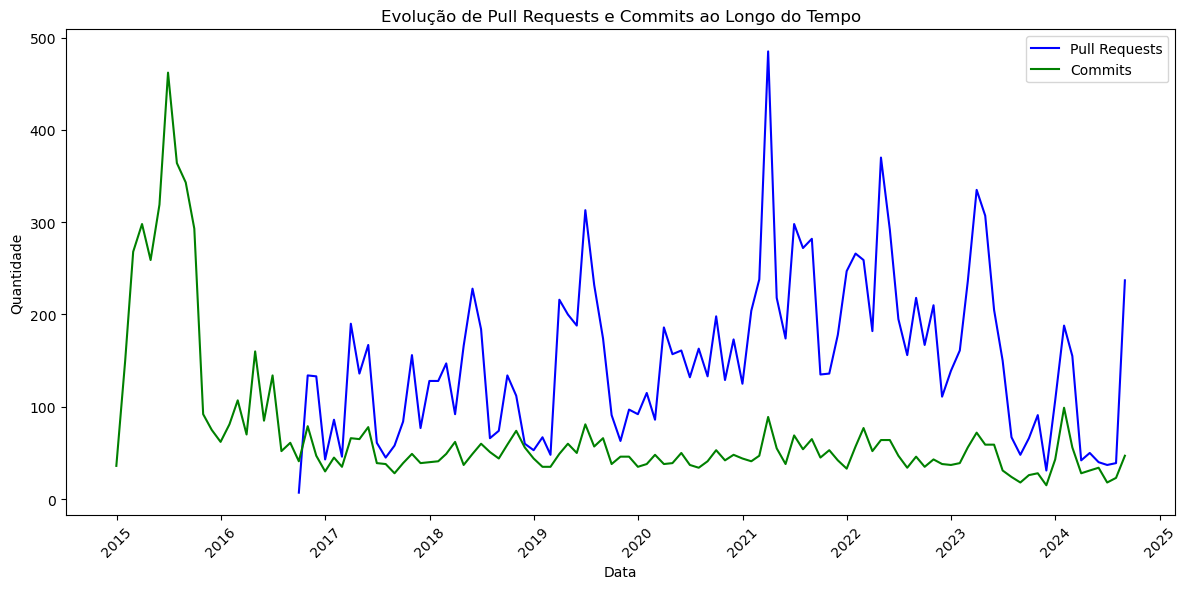

In [16]:
# Converter a coluna de data de Pull Requests para datetime e configurar como índice
df_pr['submitted_at'] = pd.to_datetime(df_pr['submitted_at'], errors='coerce')
df_pr = df_pr.dropna(subset=['submitted_at'])
df_pr.set_index('submitted_at', inplace=True)
monthly_pull_requests = df_pr.resample('M').size()

# Converter a coluna de data de Commits para datetime com timezone UTC e configurar como índice
df_commits['author_date'] = pd.to_datetime(df_commits['author_date'], errors='coerce', utc=True)
df_commits = df_commits.dropna(subset=['author_date'])
df_commits.set_index('author_date', inplace=True)
monthly_commits = df_commits.resample('M').size()

# Criar a figura para o gráfico sobreposto
plt.figure(figsize=(12, 6))

# Plotar Pull Requests
sns.lineplot(x=monthly_pull_requests.index, y=monthly_pull_requests.values, color='blue', label='Pull Requests')

# Plotar Commits
sns.lineplot(x=monthly_commits.index, y=monthly_commits.values, color='green', label='Commits')

# Configurar título, rótulos e legenda
plt.title('Evolução de Pull Requests e Commits ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.legend()  # Exibe a legenda para diferenciar as linhas

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()


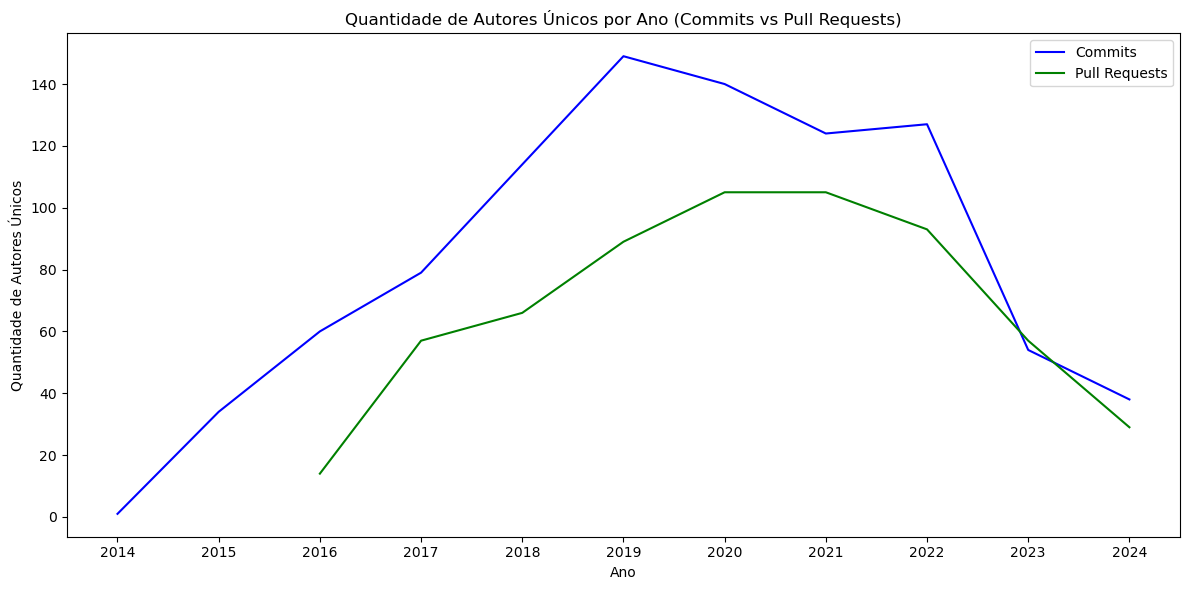

In [6]:
# Conversão de datas e contagem de autores (commits)
df_commits['author_date'] = pd.to_datetime(df_commits['author_date'], errors='coerce', utc=True)
df_commits = df_commits.dropna(subset=['author_date'])
df_commits['year'] = df_commits['author_date'].dt.year
authors_commits_per_year = df_commits.groupby('year')['author_email'].nunique()

# Conversão de datas e contagem de autores (pull requests)
df_pr['submitted_at'] = pd.to_datetime(df_pr['submitted_at'], errors='coerce')
df_pr = df_pr.dropna(subset=['submitted_at'])
df_pr['year'] = df_pr['submitted_at'].dt.year
authors_pr_per_year = df_pr.groupby('year')['author_login'].nunique()

# Plotando os dois gráficos juntos
plt.figure(figsize=(12, 6))

# Gráfico para os commits
plt.plot(authors_commits_per_year.index, authors_commits_per_year.values, label='Commits', color='blue', marker='', linestyle='-')

# Gráfico para os pull requests
plt.plot(authors_pr_per_year.index, authors_pr_per_year.values, label='Pull Requests', color='green', marker='', linestyle='-')

# Configurações do gráfico
plt.title('Quantidade de Autores Únicos por Ano (Commits vs Pull Requests)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Autores Únicos')
plt.xticks(authors_commits_per_year.index)  # Exibir todos os anos
plt.legend()  # Mostrar a legenda para diferenciar as linhas
plt.grid(False)
plt.tight_layout()

# Exibir o gráfico
plt.show()
